## San Francisco Crime Classification

https://www.kaggle.com/c/sf-crime

Description:

"From Sunset to SOMA, and Marina to Excelsior, this competition's dataset provides nearly 12 years of crime reports from across all of San Francisco's neighborhoods. Given time and location, you must predict the category of crime that occurred."

**Imports, set options.**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# enables inline plots
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 70)
pd.set_option('display.precision', 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

**Load dataset. Take a look at the columns.**


From Kaggle documentation:

Dates - timestamp of the crime incident

Category - category of the crime incident (only in train.csv). This is the target variable you are going to predict.

Descript - detailed description of the crime incident (only in train.csv)

DayOfWeek - the day of the week

PdDistrict - name of the Police Department District

Resolution - how the crime incident was resolved (only in train.csv)

Address - the approximate street address of the crime incident 

X - Longitude

Y - Latitude

In [31]:
df = pd.read_csv('/Users/eloiseheydenrych/kaggle-sf-crime/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 67.0+ MB


View first 10 rows.

In [32]:
df.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.426,37.775
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.426,37.775
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424,37.800
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.427,37.801
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.439,37.772


**Crime Categories**

What are the different crime categories?

In [33]:
CategoryList = df.Category.unique()
print CategoryList

['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']


How many entries fall into each category?

In [34]:
df.Category.value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

What are the base rates?

In [35]:
cat_percentages = df.copy()
cat_percentages['Total'] = 1

# aggregate
cat_percentages = cat_percentages.groupby('Category').agg({'Total': np.size, 'Category': np.size})

# add in percentages
cat_percentages['Total'] = len(df.index)
cat_percentages['Percentage'] = (cat_percentages['Category'] / cat_percentages['Total']) *100
cat_percentages = cat_percentages.sort_values(['Percentage'], ascending=[False])
cat_percentages.head(50)

,Category,Total,Percentage
Category,,,
LARCENY/THEFT,174900,878049,19.919
OTHER OFFENSES,126182,878049,14.371
NON-CRIMINAL,92304,878049,10.512
ASSAULT,76876,878049,8.755
DRUG/NARCOTIC,53971,878049,6.147
VEHICLE THEFT,53781,878049,6.125
VANDALISM,44725,878049,5.094
WARRANTS,42214,878049,4.808
BURGLARY,36755,878049,4.186


**Addresses**

Let's take a closer look at the Address column.

In [36]:
AddressList = df.Address.unique()
print len(AddressList)
print df.Address.value_counts()

23228
800 Block of BRYANT ST             26533
800 Block of MARKET ST              6581
2000 Block of MISSION ST            5097
1000 Block of POTRERO AV            4063
900 Block of MARKET ST              3251
0 Block of TURK ST                  3228
0 Block of 6TH ST                   2884
300 Block of ELLIS ST               2703
400 Block of ELLIS ST               2590
16TH ST / MISSION ST                2504
1000 Block of MARKET ST             2489
1100 Block of MARKET ST             2319
2000 Block of MARKET ST             2168
100 Block of OFARRELL ST            2140
700 Block of MARKET ST              2081
3200 Block of 20TH AV               2035
100 Block of 6TH ST                 1887
500 Block of JOHNFKENNEDY DR        1824
TURK ST / TAYLOR ST                 1810
200 Block of TURK ST                1800
0 Block of PHELAN AV                1791
0 Block of UNITEDNATIONS PZ         1789
0 Block of POWELL ST                1717
100 Block of EDDY ST                1681
1400 Block

A cursory glance suggests the addresses are all either a corner (contains a slash) or a block. Let's investigate this further.

In [37]:
df['StreetCorner'] = df['Address'].str.contains('/').map(int)
df['Block'] = df['Address'].str.contains('Block').map(int)
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,StreetCorner,Block
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.426,37.775,1,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.426,37.775,1,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424,37.800,1,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.427,37.801,0,1
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.439,37.772,0,1


In [38]:
df['CornerBlockSum'] = df['StreetCorner'] + df['Block']
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,StreetCorner,Block,CornerBlockSum
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.426,37.775,1,0,1
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.426,37.775,1,0,1
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424,37.800,1,0,1
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.427,37.801,0,1,1
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.439,37.772,0,1,1


In [39]:
df.CornerBlockSum.value_counts()

1    878049
Name: CornerBlockSum, dtype: int64

Like we suspected, all addresses are either a corner or a block. Might be a useful feature. Will drop one to prevent multicollinearity.

In [40]:
del df['CornerBlockSum']
del df['Block']
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,StreetCorner
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.426,37.775,1
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.426,37.775,1
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424,37.800,1
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.427,37.801,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.439,37.772,0


**Latitude and Longitude**

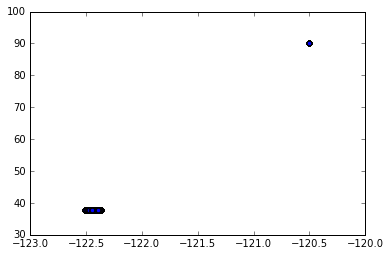

In [41]:
plt.scatter(df.X, df.Y)

There are some crazy outliers that are no where near SF. Take a closer look at those data points.

In [42]:
df_wrong_lat_long = df[df['Y'] > 80]
df_wrong_lat_long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 660485 to 871198
Data columns (total 10 columns):
Dates           67 non-null object
Category        67 non-null object
Descript        67 non-null object
DayOfWeek       67 non-null object
PdDistrict      67 non-null object
Resolution      67 non-null object
Address         67 non-null object
X               67 non-null float64
Y               67 non-null float64
StreetCorner    67 non-null int64
dtypes: float64(2), int64(1), object(7)
memory usage: 5.8+ KB


In [43]:
df_wrong_lat_long.head(70)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,StreetCorner
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.500,90.000,1
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.500,90.000,1
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.500,90.000,1
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.500,90.000,1
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.500,90.000,1
667042,2005-11-28 16:04:00,TRESPASS,TRESPASSING,Monday,TENDERLOIN,"ARREST, BOOKED",ELLIS ST / 5THSTNORTH ST,-120.500,90.000,1
669946,2005-11-14 09:20:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,BAYVIEW,"ARREST, BOOKED",YOSEMITE AV / WILLIAMS AV,-120.500,90.000,1
671709,2005-11-02 20:30:00,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Wednesday,CENTRAL,NONE,BRENHAM PL / WASHINGTON ST,-120.500,90.000,1
673078,2005-10-23 20:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,RICHMOND,NONE,AVENUE OF THE PALMS / GEARY BL,-120.500,90.000,1
673114,2005-10-23 18:11:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Sunday,TARAVAL,"ARREST, BOOKED",STCHARLES AV / 19TH AV,-120.500,90.000,1


What are the base rates? How do they compare to the base rates of the complete data set? (i.e. does the fact that the lat/long were an incorrect value help us make better predictions?)

In [46]:
wrong_lat_long_percentages = df_wrong_lat_long.copy()
wrong_lat_long_percentages['Total'] = 1
wrong_lat_long_percentages = wrong_lat_long_percentages.groupby('Category').agg({'Total': np.size, 'Category': np.size})
wrong_lat_long_percentages['Total'] = len(df_wrong_lat_long.index)
wrong_lat_long_percentages['Percentage'] = (wrong_lat_long_percentages['Category'] / wrong_lat_long_percentages['Total']) *100
wrong_lat_long_percentages = wrong_lat_long_percentages.sort_values(['Percentage'], ascending=[False])
wrong_lat_long_percentages.head(50)

,Category,Total,Percentage
Category,,,
OTHER OFFENSES,17,67,25.373
LARCENY/THEFT,15,67,22.388
VEHICLE THEFT,9,67,13.433
WARRANTS,8,67,11.940
ASSAULT,4,67,5.970
NON-CRIMINAL,4,67,5.970
DISORDERLY CONDUCT,2,67,2.985
SUSPICIOUS OCC,2,67,2.985
BURGLARY,1,67,1.493


There isn't a super strong pattern to what's ommitted. So, just impute the incorrect latitudes and longitudes with the median.

**Date and Time**

Use pd.to_datetime() to explicitly cast strings in our Date column.

In [47]:
df['Dates'] = pd.to_datetime(df['Dates'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878049 entries, 0 to 878048
Data columns (total 10 columns):
Dates           878049 non-null datetime64[ns]
Category        878049 non-null object
Descript        878049 non-null object
DayOfWeek       878049 non-null object
PdDistrict      878049 non-null object
Resolution      878049 non-null object
Address         878049 non-null object
X               878049 non-null float64
Y               878049 non-null float64
StreetCorner    878049 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 73.7+ MB


In [48]:
df['Year'] = df.Dates.dt.year
df['Month'] = df.Dates.dt.month
df['Week'] = df.Dates.dt.week
df['Day'] = df.Dates.dt.day
df['Hour'] = df.Dates.dt.hour
df['Minute'] = df.Dates.dt.minute - 30
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,StreetCorner,Year,Month,Week,Day,Hour,Minute
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.426,37.775,1,2015,5,20,13,23,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.426,37.775,1,2015,5,20,13,23,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424,37.800,1,2015,5,20,13,23,3
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.427,37.801,0,2015,5,20,13,23,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.439,37.772,0,2015,5,20,13,23,0


Which years do we have data for?

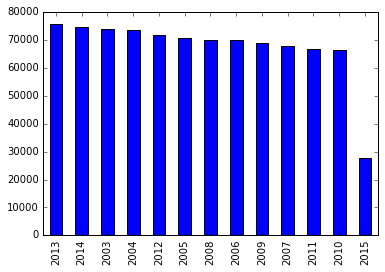

In [49]:
df['Year'].value_counts().plot(kind = 'bar')

How are crimes distributed by month?

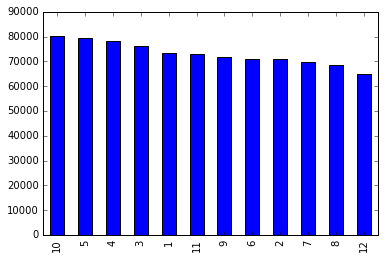

In [51]:
df['Month'].value_counts().plot(kind = 'bar')

What days of the week did most of the crimes occur on?

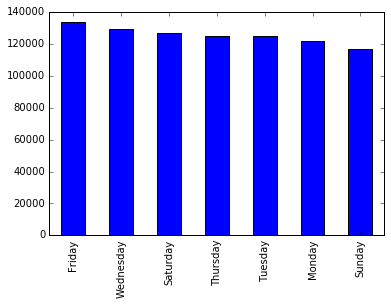

In [11]:
df['DayOfWeek'].value_counts().plot(kind = 'bar')

How are crimes distributed by hour of day?

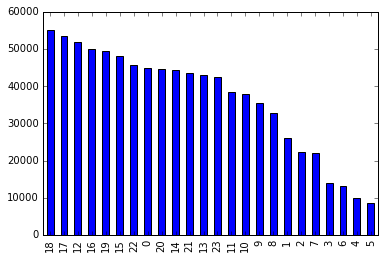

In [15]:
df['Hour'].value_counts().plot('bar')

How are crimes distributed by minute?

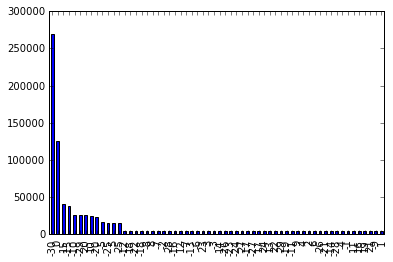

In [52]:
df['Minute'].value_counts().plot('bar')

As we can see, crime times are often rounded. In the prediction generation process we will see that whether or not a crime is associated with a likely rounded time (like 5pm instead of 5:17) tells us something about what crime types its likely to be. This is because some crimes (like thefts) happen while people are away, and so the time that gets logged is an approximation.

**Police Districts** 

How are the crime entries distributed across the police districts?

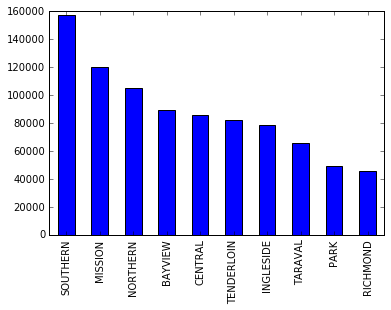

In [12]:
df['PdDistrict'].value_counts().plot('bar')

See https://github.com/EloiseRosen/kaggle-competitions/blob/master/kaggle-sf-crime/GenerateSubmission.py to see the next steps where I use this information for feature engineering and then generating predictions.